Importing the libraries

In [1]:
#Importing the necessary Visualization Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline
import cufflinks as cf
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

# Importing Sklearn
# Regression
# We import Scikit Learn
lm = LinearRegression()


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline


Importing the dataset

In [3]:
df1 = pd.read_csv('drug_prediction.csv')
df= pd.DataFrame(df1)
# Checking basic info about
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# About the Dataset
This is dataset about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

We are to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>

    
</p><li> <b> y </b> as the <b> response vector (target) </b> </li></p>


   
</ul>

In [62]:
## Creating X varibles
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]
Xi = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]


In [6]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [7]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Creating dummy variables in sklearn

In [8]:
# Importing the necessary library
from sklearn import preprocessing
# For Sex in X
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
# For BP in X
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2]= le_BP.transform(X[:,2])
# For Cholesterol
le_cho = preprocessing.LabelEncoder()
le_cho.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,3]= le_cho.transform(X[:,3])
X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now let Create Our Target Variable (Y)

In [24]:
y= df['Drug']

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>.Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=3)

In [27]:
# checking for the shapeof X and y train  whether they are equal
print('X_train=',X_train.shape,'y_train=',y_train.shape)
# checking for the shape of X and y test  whether they are equal
print('X_test=',X_test.shape,'y_test=',y_test.shape)

X_train= (140, 5) y_train= (140,)
X_test= (60, 5) y_test= (60,)


## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [28]:
from sklearn.tree import DecisionTreeClassifier
drugtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugtree  # it shows the default parameters


DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [29]:
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [114]:
df[0:140]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
135,74,M,LOW,NORMAL,11.939,drugX
136,55,F,HIGH,HIGH,10.977,drugB
137,35,F,HIGH,HIGH,12.894,drugA
138,51,M,HIGH,NORMAL,11.343,drugB


In [121]:
predtree= drugtree.predict(X_train)
ll = pd.DataFrame(predtree)
ll

KeyError: "None of ['Sex'] are in the columns"

In [31]:
# confirming the test with y_test
y_test[0:5]

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object

# Checking the Accuracy of the Decision Tree

In [98]:
from sklearn import metrics
X_testAcc = metrics.accuracy_score(y_test,predtree)
print('Decision Tree Accuracy=',X_testAcc)

Decision Tree Accuracy= 0.9833333333333333


# Plotting vizualization for our data

In [53]:
from sklearn import tree


In [91]:
fno=[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

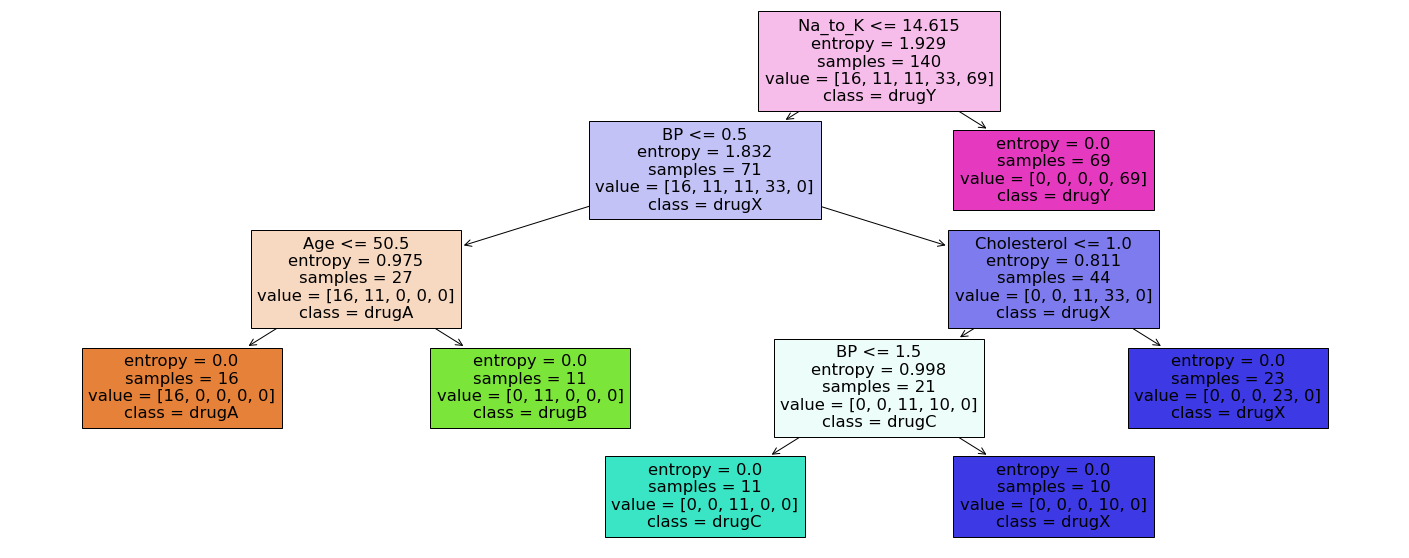

In [97]:
# Creating Columns name
fn=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].columns
# Plotting the Visualization
plt.figure(figsize=(25, 10))
a = tree.plot_tree(drugtree,
                   feature_names=df.columns[0:5],
                   class_names= np.unique(y_train),
                   filled=True)
